<a href="https://colab.research.google.com/github/Saqlain2/Data-Preprocessing-Using-PANDAS/blob/main/2ndmissing_value_impuation_using_mean_median_looking_dist_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv(r"C:\Users\SaifzWorld.Lenovo-PC\Desktop\saqlain_csv\house_pred.csv")

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
#now checking the percent of mising value data its an important thing for making any assumption 
null_var = df.isnull().sum()/df.shape[0]*100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
drop_columns = null_var[null_var>20].keys()
drop_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
#now dropping the column 
df2_drop_clm = df.drop(columns=drop_columns)
df2_drop_clm.shape

(1460, 76)

In [ ]:
#now selecting datatype  numerical and creating a df

df_num = df2_drop_clm.select_dtypes(include=['int64','float64'])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.isnull())
#we can see 3 values which are null numerical

In [ ]:
df_num[df_num.isnull().any(axis=1)]

In [ ]:
df_num.isnull().sum()

In [ ]:
#checking the value which are null and finding with simple for loop
missing_num_var = [var for var in df_num.columns
                   if df_num[var].isnull().sum()>0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
#here are three value which are missing now 
#1st will check there distribution for mean and median imputation
#2nd then will decide 
#and main catch while using mean mdian is the missing value should be ramdomly missing

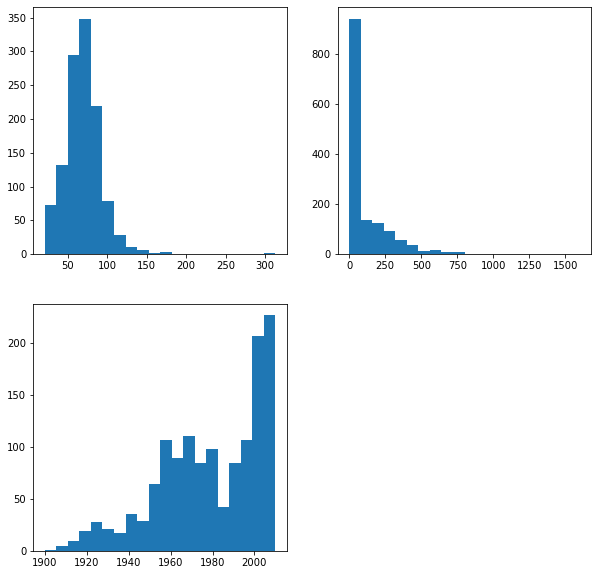

In [ ]:
plt.figure(figsize=(10,10))
for i , var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    plt.hist(df_num[var],bins=20)

In [ ]:
# as we see the 1st plot is like a guassian distribution hence we can fill our missing values with mean or median or mode
#as for guassian normal dist is same  mean = median = mode
#as we see the 2nd is left sqeww and 3rd is right sqeww here we should go with median value

In [ ]:
#A] now filling with mean value
df4_num_mean = df_num.fillna(df_num.mean())
df4_num_mean

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60    65.000000     8450            7            5   
1        2          20    80.000000     9600            6            8   
2        3          60    68.000000    11250            7            5   
3        4          70    60.000000     9550            7            5   
4        5          60    84.000000    14260            8            5   
5        6          50    85.000000    14115            5            5   
6        7          20    75.000000    10084            8            5   
7        8          60    70.049958    10382            7            6   
8        9          50    51.000000     6120            7            5   
9       10         190    50.000000     7420            5            6   
10      11          20    70.000000    11200            5            5   
11      12          60    85.000000    11924            9            5   
12      13          20    70.049958    12968            5            6   
13      14          20    91.000000    10652            7            5   
14      15          20    70.049958    10920            6            5   
15      16          45    51.000000     6120            7            8   
16      17          20    70.049958    11241            6            7   
17      18          90    72.000000    10791            4            5   
18      19          20    66.000000    13695            5            5   
19      20          20    70.000000     7560            5            6   
20      21          60   101.000000    14215            8            5   
21      22          45    57.000000     7449            7            7   
22      23          20    75.000000     9742            8            5   
23      24         120    44.000000     4224            5            7   
24      25          20    70.049958     8246            5            8   
25      26          20   110.000000    14230            8            5   
26      27          20    60.000000     7200            5            7   
27      28          20    98.000000    11478            8            5   
28      29          20    47.000000    16321            5            6   
29      30          30    60.000000     6324            4            6   
30      31          70    50.000000     8500            4            4   
31      32          20    70.049958     8544            5            6   
32      33          20    85.000000    11049            8            5   
33      34          20    70.000000    10552            5            5   
34      35         120    60.000000     7313            9            5   
35      36          60   108.000000    13418            8            5   
36      37          20   112.000000    10859            5            5   
37      38          20    74.000000     8532            5            6   
38      39          20    68.000000     7922            5            7   
39      40          90    65.000000     6040            4            5   
40      41          20    84.000000     8658            6            5   
41      42          20   115.000000    16905            5            6   
42      43          85    70.049958     9180            5            7   
43      44          20    70.049958     9200            5            6   
44      45          20    70.000000     7945            5            6   
45      46         120    61.000000     7658            9            5   
46      47          50    48.000000    12822            7            5   
47      48          20    84.000000    11096            8            5   
48      49         190    33.000000     4456            4            5   
49      50          20    66.000000     7742            5            7   
50      51          60    70.049958    13869            6            6   
51      52          50    52.000000     6240            6            6   
52      53          90   110.000000     8472            5            5   
53      54  

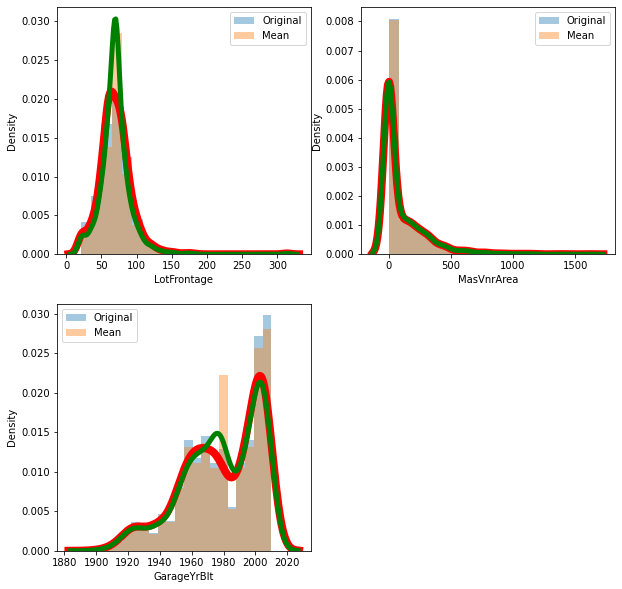

In [ ]:
#now checking the dist of df_num and df4_num
plt.figure(figsize=(10,10))
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original")
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    plt.legend()
    

In [ ]:
#as we are able to see difference by imputing mean 
#in plot 1st we get more perfect GN dist
#2nd graph doesnt change much
#3rd has changed

In [ ]:
#B] now impuiting with median and doing similar process
df5_num_median = df_num.fillna(df_num.median())
df5_num_median

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         69.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         69.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         69.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         69.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         69.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         69.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         69.0     9180            5            7   
43      44          20         69.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         69.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

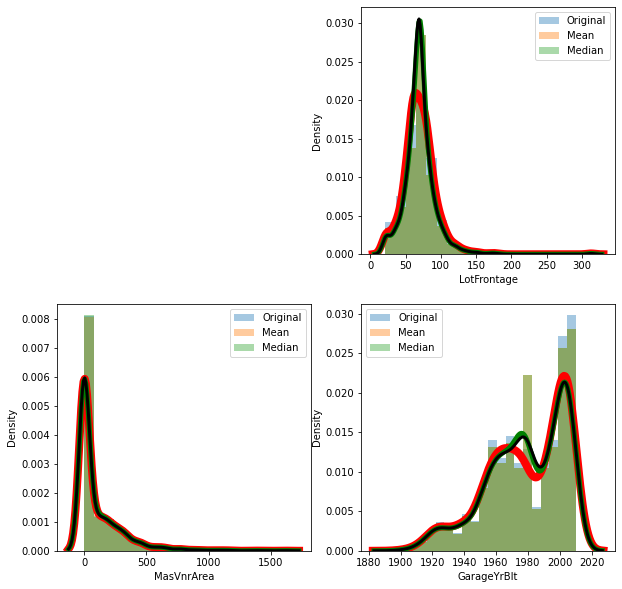

In [ ]:
#now compairing mean median and original imputation
plt.figure(figsize=(10,10))
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+2)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original")
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    sns.distplot(df5_num_median[var], bins=20, kde_kws={'linewidth':3, 'color':'k'},label="Median")
    plt.legend()
    

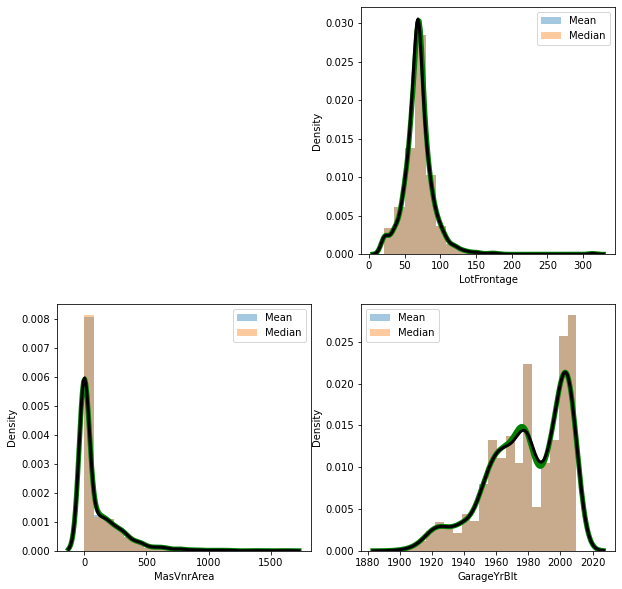

In [ ]:
#now compairing MEAN AND MEDIAN ONLY imputation
plt.figure(figsize=(10,10))
for i,var in enumerate(missing_num_var):
    plt.subplot(2,2,i+2)
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    sns.distplot(df5_num_median[var], bins=20, kde_kws={'linewidth':3, 'color':'k'},label="Median")
    plt.legend()
    
    #almost same!!
    
    

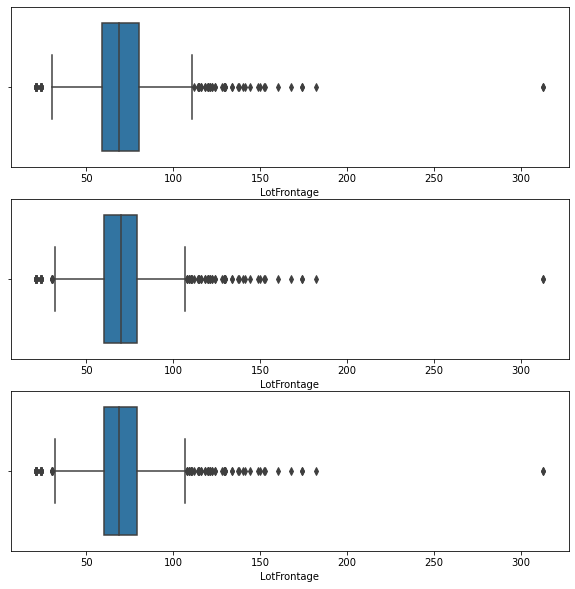

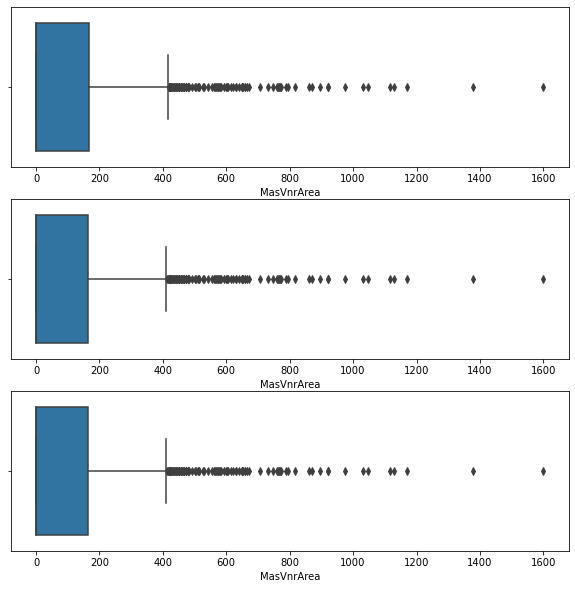

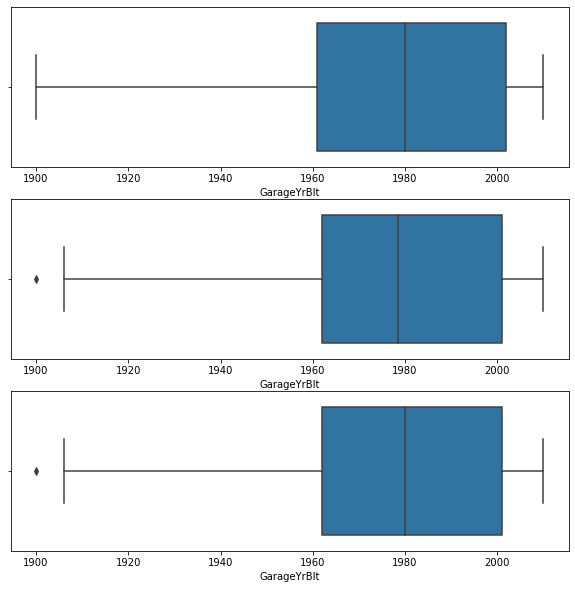

In [ ]:
#now looking for outlier using boxplot
for i ,var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_num_median[var])
   

In [ ]:
#when impute via mean median outlier get increased in normal amount

In [ ]:
#now checking concatinating all three Df
df_concat = pd.concat([df[missing_num_var],df4_num_mean[missing_num_var],df5_num_median[missing_num_var]],axis=1)
df_concat

LotFrontage  MasVnrArea  GarageYrBlt  LotFrontage   MasVnrArea  \
0            65.0       196.0       2003.0    65.000000   196.000000   
1            80.0         0.0       1976.0    80.000000     0.000000   
2            68.0       162.0       2001.0    68.000000   162.000000   
3            60.0         0.0       1998.0    60.000000     0.000000   
4            84.0       350.0       2000.0    84.000000   350.000000   
5            85.0         0.0       1993.0    85.000000     0.000000   
6            75.0       186.0       2004.0    75.000000   186.000000   
7             NaN       240.0       1973.0    70.049958   240.000000   
8            51.0         0.0       1931.0    51.000000     0.000000   
9            50.0         0.0       1939.0    50.000000     0.000000   
10           70.0         0.0       1965.0    70.000000     0.000000   
11           85.0       286.0       2005.0    85.000000   286.000000   
12            NaN         0.0       1962.0    70.049958     0.000000   
13           91.0       306.0       2006.0    91.000000   306.000000   
14            NaN       212.0       1960.0    70.049958   212.000000   
15           51.0         0.0       1991.0    51.000000     0.000000   
16            NaN       180.0       1970.0    70.049958   180.000000   
17           72.0         0.0       1967.0    72.000000     0.000000   
18           66.0         0.0       2004.0    66.000000     0.000000   
19           70.0         0.0       1958.0    70.000000     0.000000   
20          101.0       380.0       2005.0   101.000000   380.000000   
21           57.0         0.0       1930.0    57.000000     0.000000   
22           75.0       281.0       2002.0    75.000000   281.000000   
23           44.0         0.0       1976.0    44.000000     0.000000   
24            NaN         0.0       1968.0    70.049958     0.000000   
25          110.0       640.0       2007.0   110.000000   640.000000   
26           60.0         0.0       2005.0    60.000000     0.000000   
27           98.0       200.0       2008.0    98.000000   200.000000   
28           47.0         0.0       1957.0    47.000000     0.000000   
29           60.0         0.0       1920.0    60.000000     0.000000   
30           50.0         0.0       1920.0    50.000000     0.000000   
31            NaN         0.0       1966.0    70.049958     0.000000   
32           85.0         0.0       2007.0    85.000000     0.000000   
33           70.0         0.0       1959.0    70.000000     0.000000   
34           60.0       246.0       2005.0    60.000000   246.000000   
35          108.0       132.0       2004.0   108.000000   132.000000   
36          112.0         0.0       1995.0   112.000000     0.000000   
37           74.0       650.0       1954.0    74.000000   650.000000   
38           68.0         0.0       1953.0    68.000000     0.000000   
39           65.0         0.0          NaN    65.000000     0.000000   
40           84.0       101.0       1965.0    84.000000   101.000000   
41          115.0         0.0       1959.0   115.000000     0.000000   
42            NaN         0.0       1983.0    70.049958     0.000000   
43            NaN         0.0       1977.0    70.049958     0.000000   
44           70.0         0.0       1959.0    70.000000     0.000000   
45           61.0       412.0       2005.0    61.000000   412.000000   
46           48.0         0.0       2003.0    48.000000     0.000000   
47           84.0         0.0       2006.0    84.000000     0.000000   
48           33.0         0.0          NaN    33.000000     0.000000   
49           66.0         0.0       1966.0    66.000000     0.000000   
50            NaN         0.0       1997.0    70.049958     0.000000   
51           52.0         0.0       1985.0    52.000000     0.000000   
52          110.0         0.0       1963.0   110.000000     0.000000   
53           68.0         0.0       1981.0    68.000000     0.000000   
54           60.0         0.0       1962.0    